In [315]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.tree import plot_tree
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

## Import Data

In [316]:
df = pd.read_csv(r"C:\Users\gabri\Downloads\conversion_data.csv")

In [317]:
df.head()

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,0,1,North America,youtube,M,4,5,2,1,2,...,33,23,46,57,4,5,5,4,6,1
1,1,2,South America,organic,F,2,5,0,1,5,...,28,39,24,51,5,6,7,6,2,0
2,2,3,Australia,instagram,M,3,4,0,-3,5,...,34,22,34,31,1,3,3,2,3,1
3,3,4,North America,facebook,M,1,0,0,5,0,...,26,43,22,39,3,4,7,7,1,0
4,4,5,Asia,instagram,F,1,5,2,2,3,...,54,30,47,57,6,6,5,2,4,1


In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   2000 non-null   object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

No missing data

In [319]:
df.describe(include = 'all')

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
count,2000.000000,2000.000000,2000,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
unique,NaN,NaN,5,5,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,South America,instagram,F,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,433,431,1093,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,999.500000,1000.500000,NaN,NaN,NaN,2.541500,2.440500,2.441000,2.256500,2.354000,...,39.776500,40.155500,40.417000,40.028500,3.946000,4.071000,4.092500,3.921000,4.089500,0.372000
std,577.494589,577.494589,NaN,NaN,NaN,1.704914,1.715206,2.343345,2.370974,2.335682,...,11.855624,11.757399,11.892638,11.664207,2.010001,2.012209,2.002985,2.023316,2.026954,0.483459
min,0.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,-4.000000,-3.000000,...,20.000000,20.000000,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,499.750000,500.750000,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,29.000000,30.000000,30.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,999.500000,1000.500000,NaN,NaN,NaN,3.000000,2.000000,2.000000,2.000000,2.000000,...,40.000000,40.000000,40.500000,40.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,1499.250000,1500.250000,NaN,NaN,NaN,4.000000,4.000000,4.000000,5.000000,5.000000,...,50.000000,50.000000,51.000000,50.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000


Some variables are categorical while some are continous. Lets remove the unnamed column as it is not needed.

In [320]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [321]:
df.head()

,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,1,North America,youtube,M,4,5,2,1,2,3.90,...,33,23,46,57,4,5,5,4,6,1
1,2,South America,organic,F,2,5,0,1,5,1.31,...,28,39,24,51,5,6,7,6,2,0
2,3,Australia,instagram,M,3,4,0,-3,5,3.26,...,34,22,34,31,1,3,3,2,3,1
3,4,North America,facebook,M,1,0,0,5,0,2.66,...,26,43,22,39,3,4,7,7,1,0
4,5,Asia,instagram,F,1,5,2,2,3,2.76,...,54,30,47,57,6,6,5,2,4,1


# Data Cleaning

Drop duplicates

In [322]:
df.drop_duplicates(inplace=True)

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   visitor_id         2000 non-null   int64  
 1   visitor_location   2000 non-null   object 
 2   marketing_channel  2000 non-null   object 
 3   gender             2000 non-null   object 
 4   product_views_Mon  2000 non-null   int64  
 5   product_views_Tue  2000 non-null   int64  
 6   product_views_Wed  2000 non-null   int64  
 7   product_views_Thu  2000 non-null   int64  
 8   product_views_Fri  2000 non-null   int64  
 9   avg_rating_Mon     2000 non-null   float64
 10  avg_rating_Tue     2000 non-null   float64
 11  avg_rating_Wed     2000 non-null   float64
 12  avg_rating_Thu     2000 non-null   float64
 13  avg_rating_Fri     2000 non-null   float64
 14  avg_price_Mon      2000 non-null   float64
 15  avg_price_Tue      2000 non-null   float64
 16  avg_price_Wed      2000 

In [324]:
df.columns

Index(['visitor_id', 'visitor_location', 'marketing_channel', 'gender',
       'product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'converted_Fri'],
      dtype='object')

Lets create histogram plots for all variables

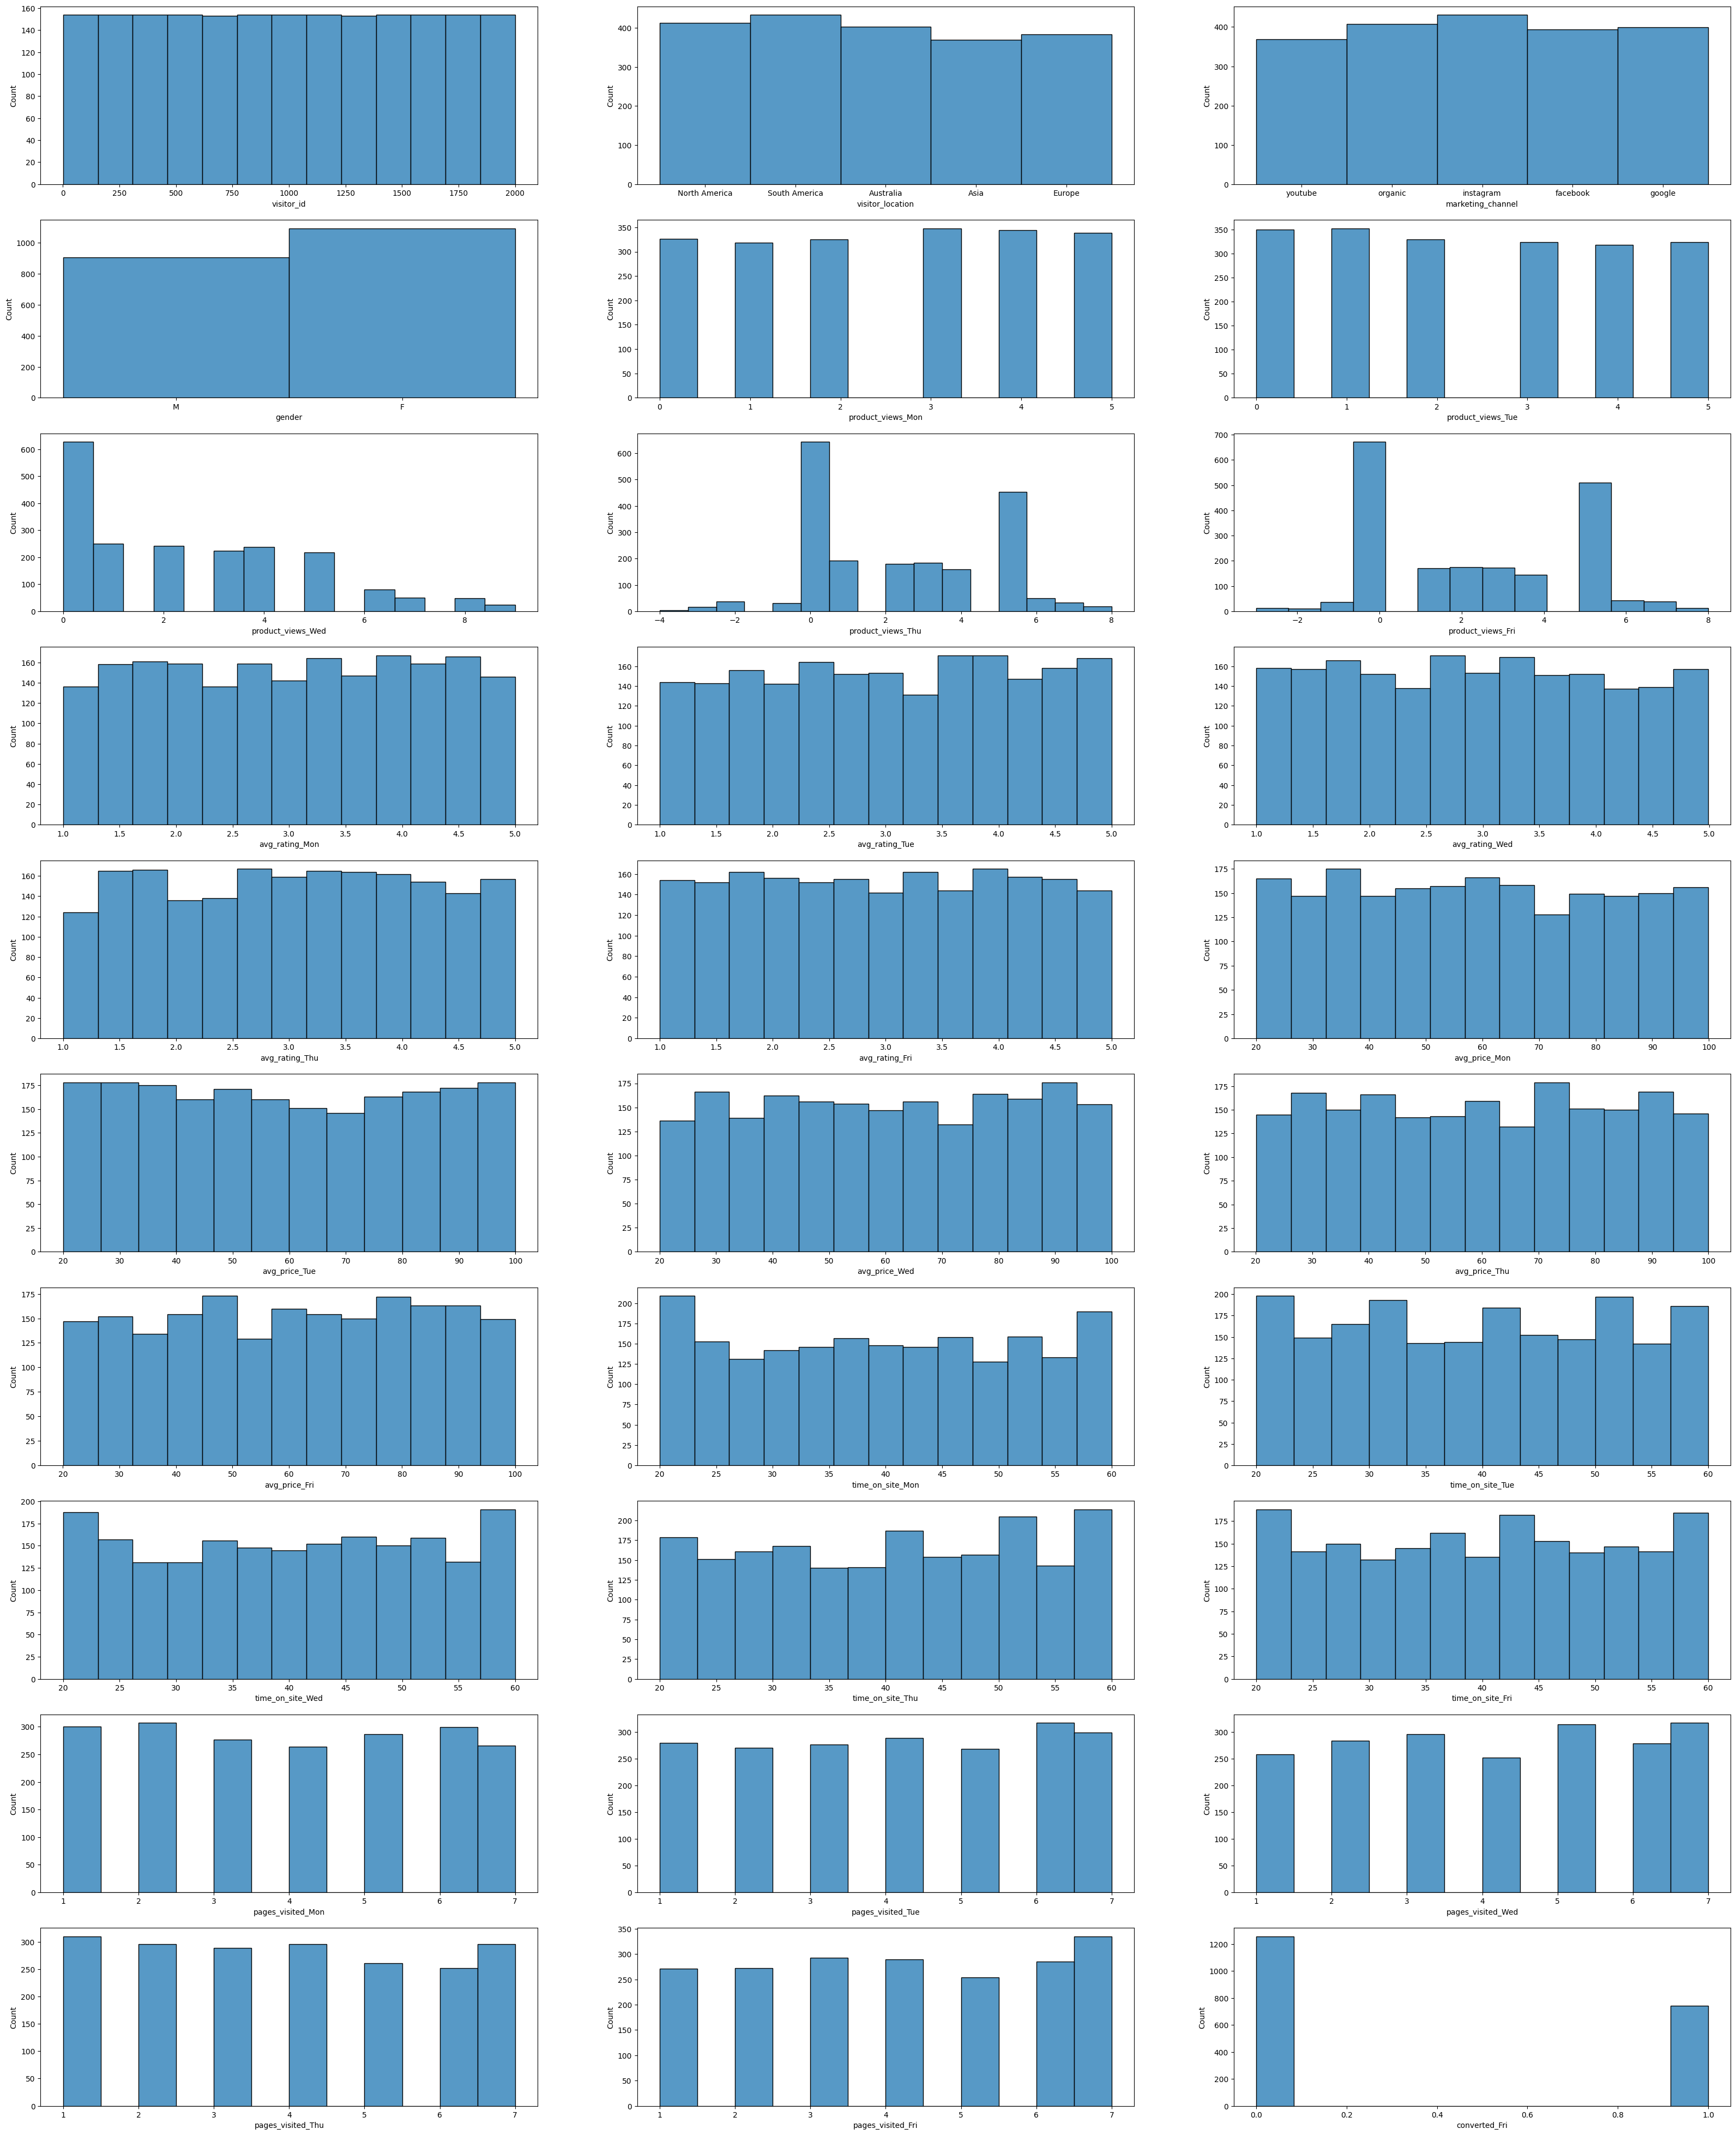

In [325]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15), (ax16, ax17, ax18), (ax19, ax20, ax21), (ax22, ax23, ax24), (ax25, ax26, ax27), (ax28, ax29, ax30)) = plt.subplots(10, 3, figsize=(40, 50))

sns.histplot(df['visitor_id'], ax=ax1)
sns.histplot(df['visitor_location'], ax=ax2)
sns.histplot(df['marketing_channel'], ax=ax3)
sns.histplot(df['gender'], ax=ax4)
sns.histplot(df['product_views_Mon'], ax=ax5)
sns.histplot(df['product_views_Tue'], ax=ax6)
sns.histplot(df['product_views_Wed'], ax=ax7)
sns.histplot(df['product_views_Thu'], ax=ax8)
sns.histplot(df['product_views_Fri'], ax=ax9)
sns.histplot(df['avg_rating_Mon'], ax=ax10)
sns.histplot(df['avg_rating_Tue'], ax=ax11)
sns.histplot(df['avg_rating_Wed'], ax=ax12)
sns.histplot(df['avg_rating_Thu'], ax=ax13)
sns.histplot(df['avg_rating_Fri'], ax=ax14)
sns.histplot(df['avg_price_Mon'], ax=ax15)
sns.histplot(df['avg_price_Tue'], ax=ax16)
sns.histplot(df['avg_price_Wed'], ax=ax17)
sns.histplot(df['avg_price_Thu'], ax=ax18)
sns.histplot(df['avg_price_Fri'], ax=ax19)
sns.histplot(df['time_on_site_Mon'], ax=ax20)
sns.histplot(df['time_on_site_Tue'], ax=ax21)
sns.histplot(df['time_on_site_Wed'], ax=ax22)
sns.histplot(df['time_on_site_Thu'], ax=ax23)
sns.histplot(df['time_on_site_Fri'], ax=ax24)
sns.histplot(df['pages_visited_Mon'], ax=ax25)
sns.histplot(df['pages_visited_Tue'], ax=ax26)
sns.histplot(df['pages_visited_Wed'], ax=ax27)
sns.histplot(df['pages_visited_Thu'], ax=ax28)
sns.histplot(df['pages_visited_Fri'], ax=ax29)
sns.histplot(df['converted_Fri'], ax=ax30)

plt.show()

The data appears to be fairly evenly distributed, with the exception of some product views variables.

The target variable is converted_fri. Normally at this point a z-score would be performed to see if any data is outside three standard deviations. However, since this is a categorical variable between 0 and 1, z-score will not be necessary. 

Now lets create the same graphs except as boxplots to better see if there are any outliers relative to itself

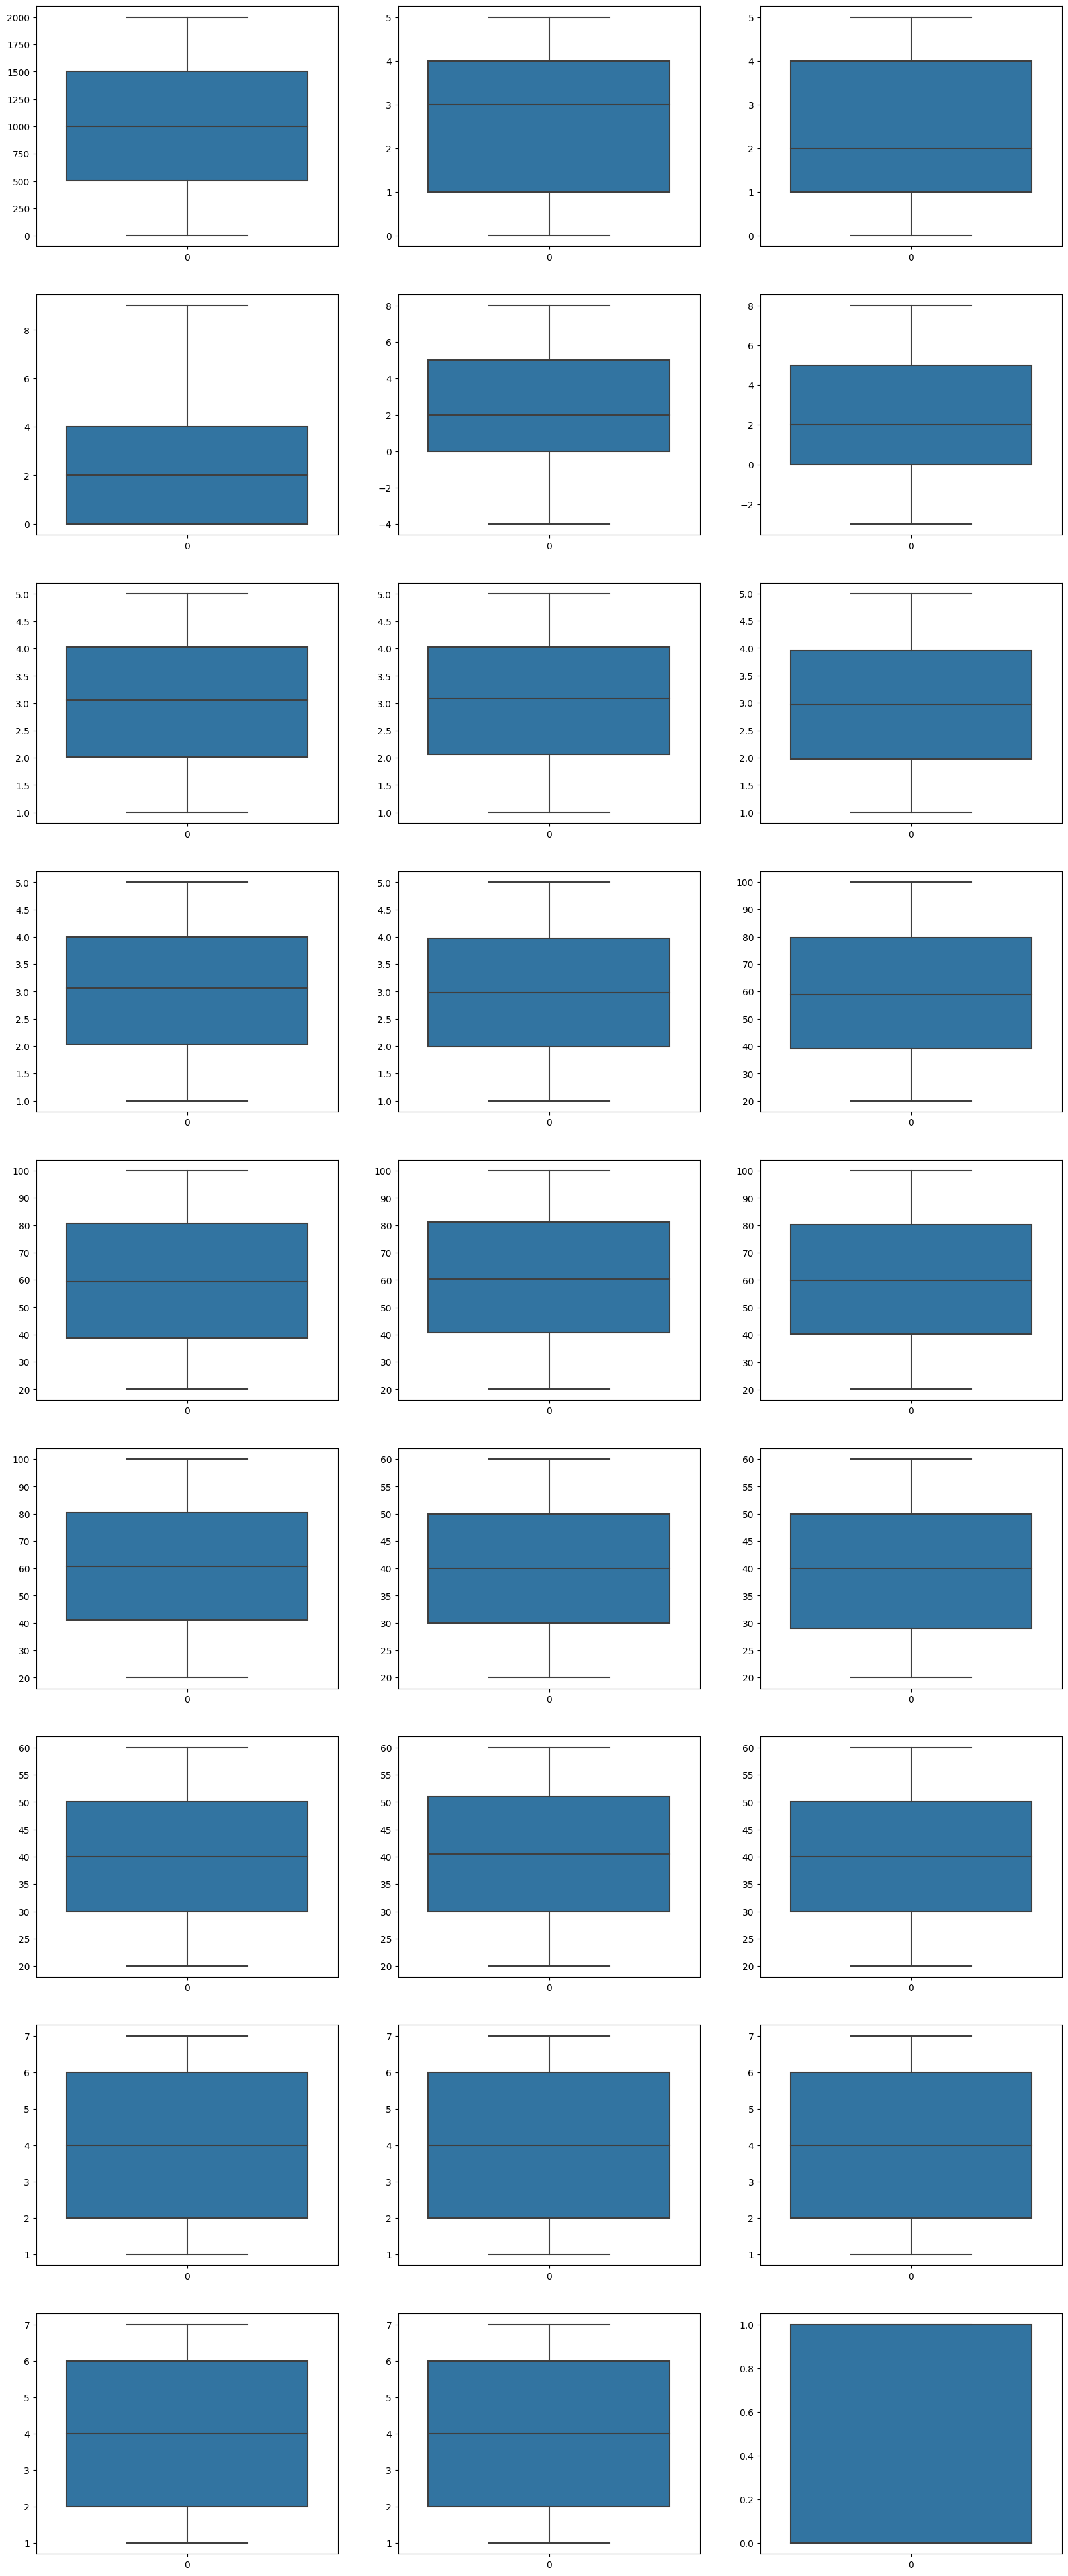

In [326]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15), (ax16, ax17, ax18), (ax19, ax20, ax21), (ax22, ax23, ax24), (ax25, ax26, ax27)) = plt.subplots(9, 3, figsize=(20, 50))

sns.boxplot(df['visitor_id'], ax=ax1)
sns.boxplot(df['product_views_Mon'], ax=ax2)
sns.boxplot(df['product_views_Tue'], ax=ax3)
sns.boxplot(df['product_views_Wed'], ax=ax4)
sns.boxplot(df['product_views_Thu'], ax=ax5)
sns.boxplot(df['product_views_Fri'], ax=ax6)
sns.boxplot(df['avg_rating_Mon'], ax=ax7)
sns.boxplot(df['avg_rating_Tue'], ax=ax8)
sns.boxplot(df['avg_rating_Wed'], ax=ax9)
sns.boxplot(df['avg_rating_Thu'], ax=ax10)
sns.boxplot(df['avg_rating_Fri'], ax=ax11)
sns.boxplot(df['avg_price_Mon'], ax=ax12)
sns.boxplot(df['avg_price_Tue'], ax=ax13)
sns.boxplot(df['avg_price_Wed'], ax=ax14)
sns.boxplot(df['avg_price_Thu'], ax=ax15)
sns.boxplot(df['avg_price_Fri'], ax=ax16)
sns.boxplot(df['time_on_site_Mon'], ax=ax17)
sns.boxplot(df['time_on_site_Tue'], ax=ax18)
sns.boxplot(df['time_on_site_Wed'], ax=ax19)
sns.boxplot(df['time_on_site_Thu'], ax=ax20)
sns.boxplot(df['time_on_site_Fri'], ax=ax21)
sns.boxplot(df['pages_visited_Mon'], ax=ax22)
sns.boxplot(df['pages_visited_Tue'], ax=ax23)
sns.boxplot(df['pages_visited_Wed'], ax=ax24)
sns.boxplot(df['pages_visited_Thu'], ax=ax25)
sns.boxplot(df['pages_visited_Fri'], ax=ax26)
sns.boxplot(df['converted_Fri'], ax=ax27)

plt.show()

There are outliers present at product_views_Thu and product_views_Fri. Lets remove them.

In [327]:
df[df['product_views_Thu'] < 0]

,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
2,3,Australia,instagram,M,3,4,0,-3,5,3.26,...,34,22,34,31,1,3,3,2,3,1
17,18,South America,facebook,F,4,1,0,-2,5,2.33,...,60,24,35,31,7,5,6,4,2,1
34,35,South America,organic,F,0,0,3,-2,5,2.13,...,39,32,60,53,1,7,2,5,7,1
89,90,Asia,youtube,F,1,3,1,-4,2,4.26,...,49,50,49,27,2,3,6,6,5,1
117,118,North America,facebook,F,5,1,3,-2,5,1.53,...,24,51,56,47,5,6,4,7,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,1949,Europe,youtube,F,5,3,4,-2,3,4.56,...,23,28,48,38,6,7,3,5,7,1
1956,1957,Australia,youtube,M,3,1,2,-1,4,4.63,...,33,57,47,54,2,1,1,2,3,1
1965,1966,Europe,google,M,4,5,5,-1,5,2.38,...,34,55,49,60,4,5,4,4,3,1
1971,1972,North America,organic,F,5,5,4,-2,5,4.78,...,54,46,58,42,4,2,7,2,5,1


In [328]:
df.drop(df[df['product_views_Thu'] < 0].index, axis=0, inplace=True)

In [329]:
df[df['product_views_Fri'] < 0]

,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
35,36,South America,google,M,4,3,4,4,-3,3.58,...,30,56,44,41,2,6,2,3,3,1
78,79,Asia,facebook,F,4,4,5,5,-1,4.06,...,26,26,43,38,6,1,5,4,7,1
115,116,Asia,instagram,F,3,5,2,5,-2,2.02,...,52,40,35,52,1,3,5,3,5,1
140,141,Australia,google,F,2,5,2,0,-3,1.77,...,22,33,56,58,6,6,2,7,3,1
163,164,Europe,organic,M,4,1,0,2,-1,3.97,...,31,48,49,35,1,4,4,5,2,1
167,168,Europe,instagram,F,3,0,3,1,-2,3.88,...,25,41,39,57,3,6,4,7,3,1
178,179,North America,google,F,1,2,5,1,-1,2.32,...,42,47,50,33,5,7,1,5,1,1
194,195,North America,instagram,M,0,3,4,4,-2,1.76,...,50,46,56,35,2,3,6,5,1,1
221,222,Asia,instagram,M,5,0,3,4,-1,4.80,...,42,22,47,39,2,7,4,7,5,1
226,227,Europe,youtube,F,3,1,3,2,-1,3.35,...,42,53,35,20,1,2,7,6,4,1


In [330]:
df.drop(df[df['product_views_Fri'] < 0].index, axis=0, inplace=True)

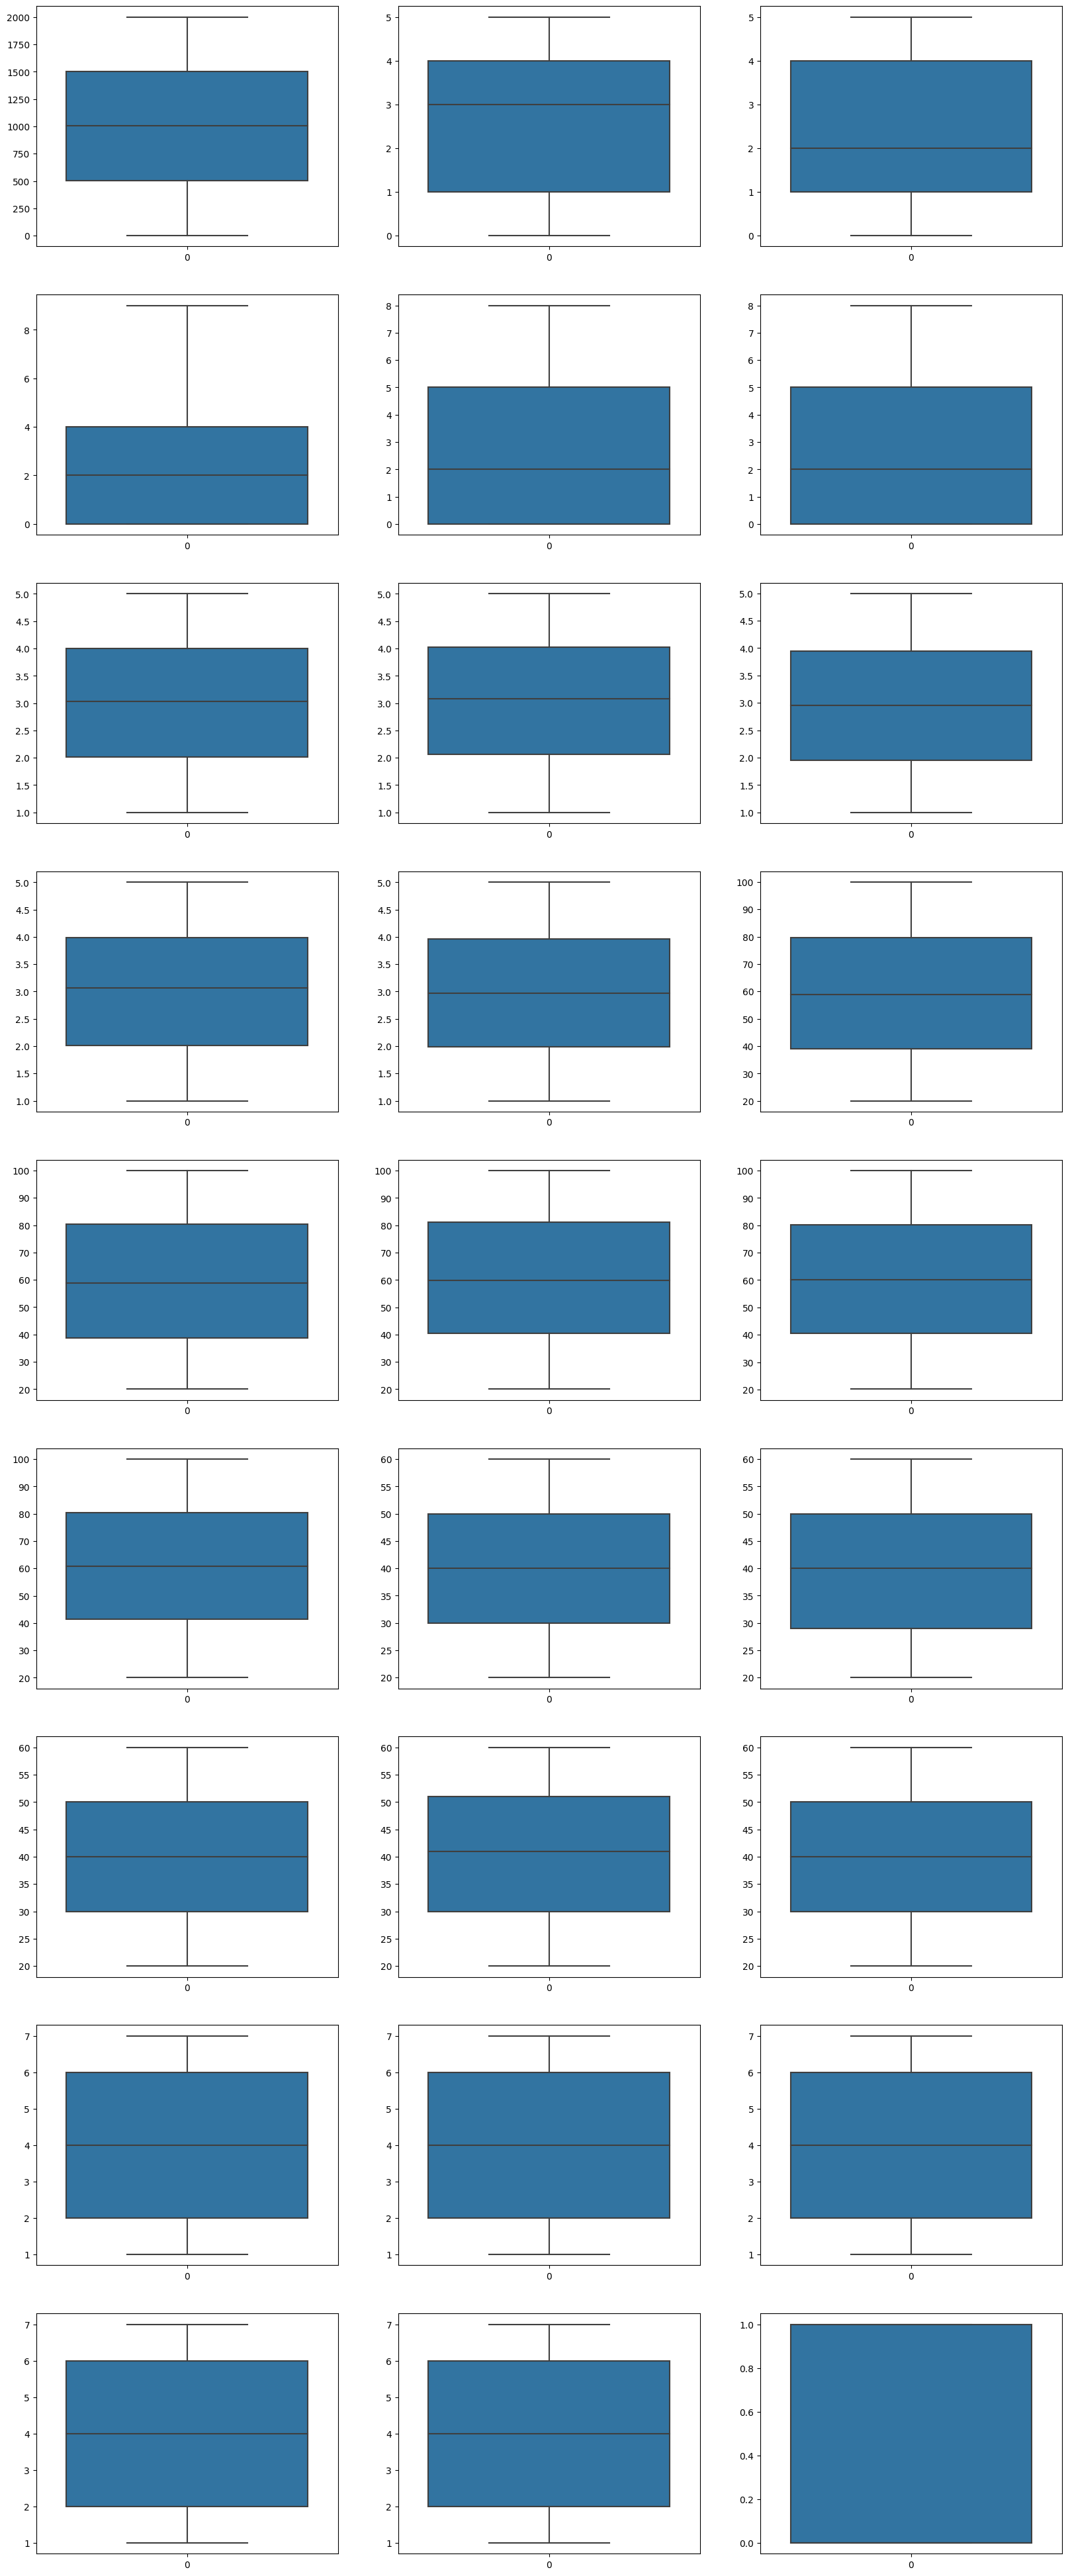

In [331]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15), (ax16, ax17, ax18), (ax19, ax20, ax21), (ax22, ax23, ax24), (ax25, ax26, ax27)) = plt.subplots(9, 3, figsize=(20, 50))

sns.boxplot(df['visitor_id'], ax=ax1)
sns.boxplot(df['product_views_Mon'], ax=ax2)
sns.boxplot(df['product_views_Tue'], ax=ax3)
sns.boxplot(df['product_views_Wed'], ax=ax4)
sns.boxplot(df['product_views_Thu'], ax=ax5)
sns.boxplot(df['product_views_Fri'], ax=ax6)
sns.boxplot(df['avg_rating_Mon'], ax=ax7)
sns.boxplot(df['avg_rating_Tue'], ax=ax8)
sns.boxplot(df['avg_rating_Wed'], ax=ax9)
sns.boxplot(df['avg_rating_Thu'], ax=ax10)
sns.boxplot(df['avg_rating_Fri'], ax=ax11)
sns.boxplot(df['avg_price_Mon'], ax=ax12)
sns.boxplot(df['avg_price_Tue'], ax=ax13)
sns.boxplot(df['avg_price_Wed'], ax=ax14)
sns.boxplot(df['avg_price_Thu'], ax=ax15)
sns.boxplot(df['avg_price_Fri'], ax=ax16)
sns.boxplot(df['time_on_site_Mon'], ax=ax17)
sns.boxplot(df['time_on_site_Tue'], ax=ax18)
sns.boxplot(df['time_on_site_Wed'], ax=ax19)
sns.boxplot(df['time_on_site_Thu'], ax=ax20)
sns.boxplot(df['time_on_site_Fri'], ax=ax21)
sns.boxplot(df['pages_visited_Mon'], ax=ax22)
sns.boxplot(df['pages_visited_Tue'], ax=ax23)
sns.boxplot(df['pages_visited_Wed'], ax=ax24)
sns.boxplot(df['pages_visited_Thu'], ax=ax25)
sns.boxplot(df['pages_visited_Fri'], ax=ax26)
sns.boxplot(df['converted_Fri'], ax=ax27)

plt.show()

In [332]:
df.describe(include = 'all')

,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
count,1859.000000,1859,1859,1859,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,...,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000
unique,NaN,5,5,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,South America,instagram,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,402,398,1006,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1002.627219,NaN,NaN,NaN,2.545992,2.440559,2.422808,2.414739,2.418505,3.012297,...,39.653039,40.194728,40.466380,39.916084,3.928456,4.076385,4.109736,3.922539,4.094137,0.324368
std,577.318456,NaN,NaN,NaN,1.708400,1.713334,2.386010,2.240785,2.259819,1.151558,...,11.901669,11.771861,11.920364,11.714281,2.005842,2.017303,2.011754,2.026047,2.030251,0.468264
min,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,20.000000,20.000000,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,502.500000,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,2.010000,...,29.000000,30.000000,30.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,1003.000000,NaN,NaN,NaN,3.000000,2.000000,2.000000,2.000000,2.000000,3.030000,...,40.000000,40.000000,41.000000,40.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,1501.500000,NaN,NaN,NaN,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,...,50.000000,50.000000,51.000000,50.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000


In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1859 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   visitor_id         1859 non-null   int64  
 1   visitor_location   1859 non-null   object 
 2   marketing_channel  1859 non-null   object 
 3   gender             1859 non-null   object 
 4   product_views_Mon  1859 non-null   int64  
 5   product_views_Tue  1859 non-null   int64  
 6   product_views_Wed  1859 non-null   int64  
 7   product_views_Thu  1859 non-null   int64  
 8   product_views_Fri  1859 non-null   int64  
 9   avg_rating_Mon     1859 non-null   float64
 10  avg_rating_Tue     1859 non-null   float64
 11  avg_rating_Wed     1859 non-null   float64
 12  avg_rating_Thu     1859 non-null   float64
 13  avg_rating_Fri     1859 non-null   float64
 14  avg_price_Mon      1859 non-null   float64
 15  avg_price_Tue      1859 non-null   float64
 16  avg_price_Wed      1859 non-n

The uni-variate analysis is complete.

As a prediction, I believe demographic will be the more important factor.

Now for bi-variate analysis, lets first compare continous variables to the target variable established.

<Axes: xlabel='converted_Fri', ylabel='product_views_Fri'>

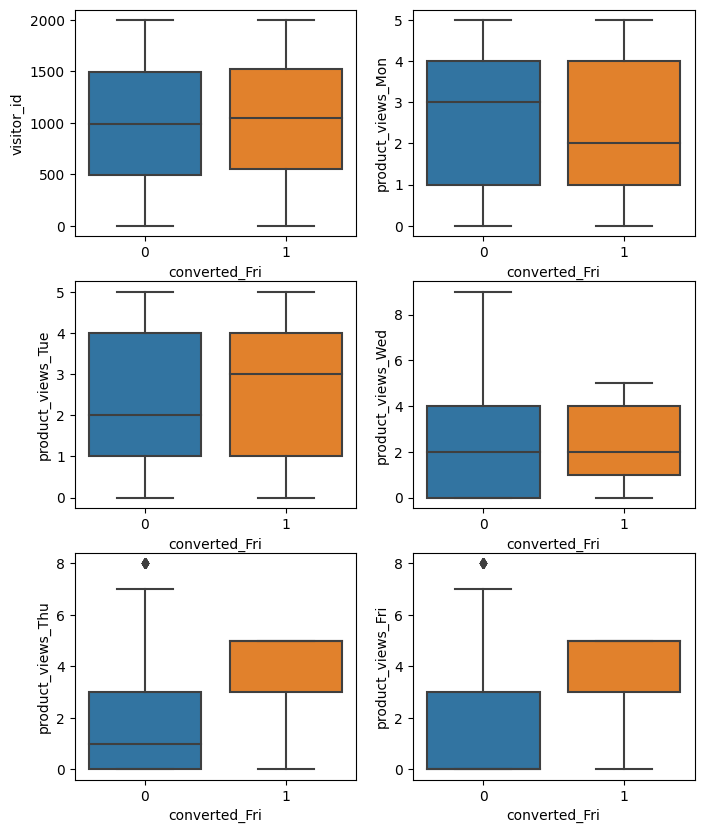

In [334]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(8,10))

sns.boxplot(x='converted_Fri',y='visitor_id', data=df, ax=ax1)
sns.boxplot(x='converted_Fri',y='product_views_Mon', data=df, ax=ax2)
sns.boxplot(x='converted_Fri',y='product_views_Tue', data=df, ax=ax3)
sns.boxplot(x='converted_Fri',y='product_views_Wed', data=df, ax=ax4)
sns.boxplot(x='converted_Fri',y='product_views_Thu', data=df, ax=ax5)
sns.boxplot(x='converted_Fri',y='product_views_Fri', data=df, ax=ax6)

## Takeaways from the Boxplots

Products Viewed Monday: There were less conversions for the people who viewed more products.

Products Viewed Tuesday: There were more conversions for the people who viewed more products.

Products Viewed Wednesday: There were about the same number conversions for the people who viewed products. The range might be different, but they are roughly the same. 

Products Viewed Thursday: There were more conversions for the people who viewed more products. There might be some "outliers" at viewing 8 products, but since the difference between 7 and 8 is 1, we will let it slide.

Products Viewed Friday: There were more conversions for the people who viewed more products. There might be some "outliers" at viewing 8 products, but since the difference between 7 and 8 is 1, we will let it slide.

<Axes: xlabel='converted_Fri', ylabel='avg_rating_Fri'>

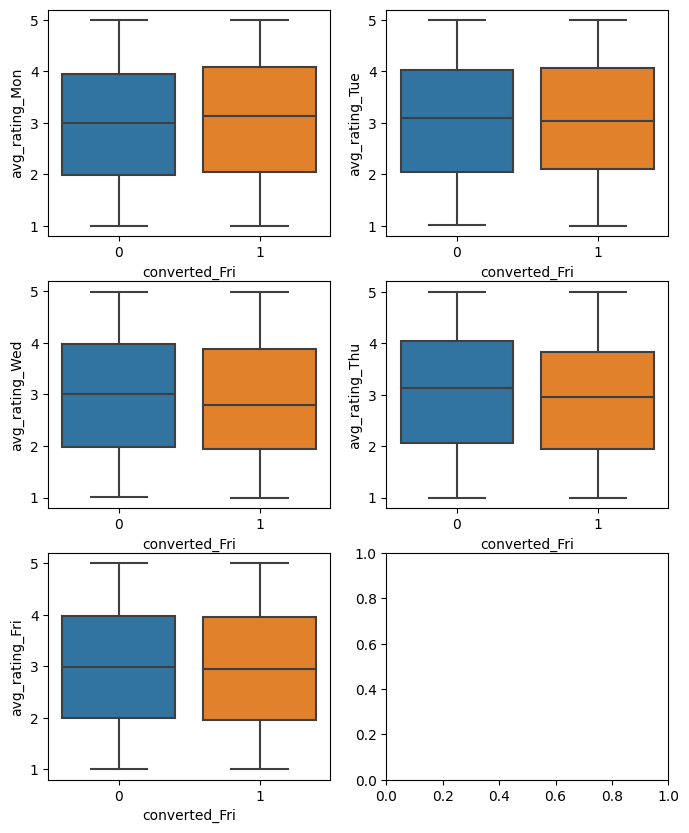

In [335]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, _)) = plt.subplots(3,2, figsize=(8,10))

sns.boxplot(x='converted_Fri',y='avg_rating_Mon', data=df, ax=ax1)
sns.boxplot(x='converted_Fri',y='avg_rating_Tue', data=df, ax=ax2)
sns.boxplot(x='converted_Fri',y='avg_rating_Wed', data=df, ax=ax3)
sns.boxplot(x='converted_Fri',y='avg_rating_Thu', data=df, ax=ax4)
sns.boxplot(x='converted_Fri',y='avg_rating_Fri', data=df, ax=ax5)

## Boxplot Takeaways

Average rating Monday: The average rating slightly favours people who converted, but not enough to suggest a correlation.

Average rating Tuesday: The average rating slightly favours people who did not convert, but not enough to suggest a correlation.

Average rating Wednesday: The average rating favours people who did not convert.

Average rating Thursday: The average rating slightly favours people who did not convert.

Average rating Friday: The average rating slightly favours people who did not convert, but not enough to suggest a correlation.

<Axes: xlabel='converted_Fri', ylabel='avg_price_Fri'>

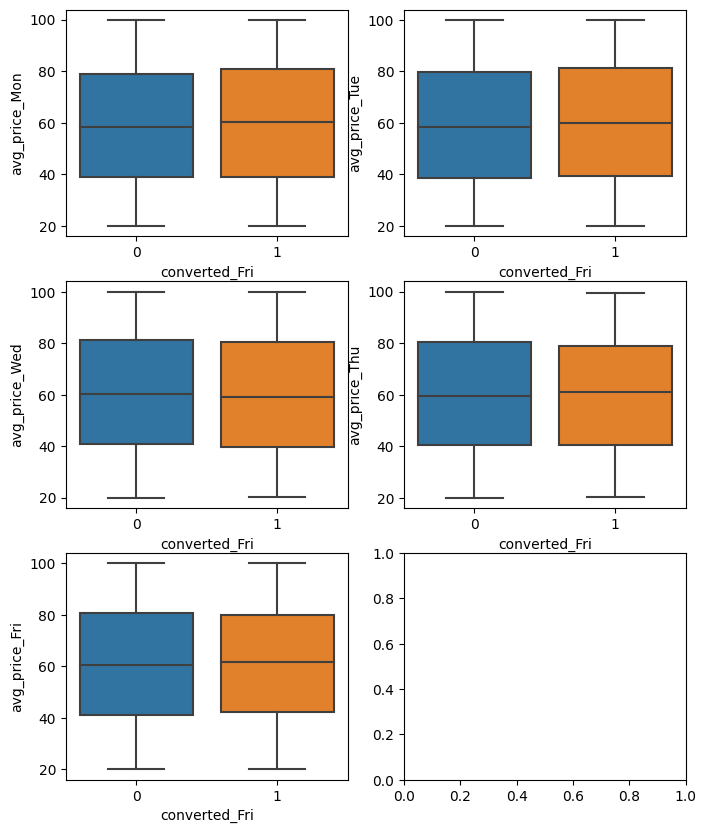

In [336]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, _)) = plt.subplots(3,2, figsize=(8,10))

sns.boxplot(x='converted_Fri',y='avg_price_Mon', data=df, ax=ax1)
sns.boxplot(x='converted_Fri',y='avg_price_Tue', data=df, ax=ax2)
sns.boxplot(x='converted_Fri',y='avg_price_Wed', data=df, ax=ax3)
sns.boxplot(x='converted_Fri',y='avg_price_Thu', data=df, ax=ax4)
sns.boxplot(x='converted_Fri',y='avg_price_Fri', data=df, ax=ax5)

## Boxplot Takeaways

Average price Monday: The average price was slightly higher for people who converted, but not enough to suggest a correlation.

Average price Tuesday: The average price was slightly higher for people who converted, but not enough to suggest a correlation.

Average price Wednesday: The average price was slightly higher for people who did not convert, but not enough to suggest a correlation.

Average price Thursday: The average price was slightly higher for people who converted, but not enough to suggest a correlation.

Average price Friday: The average price was slightly higher for people who converted, but not enough to suggest a correlation.

<Axes: xlabel='converted_Fri', ylabel='time_on_site_Fri'>

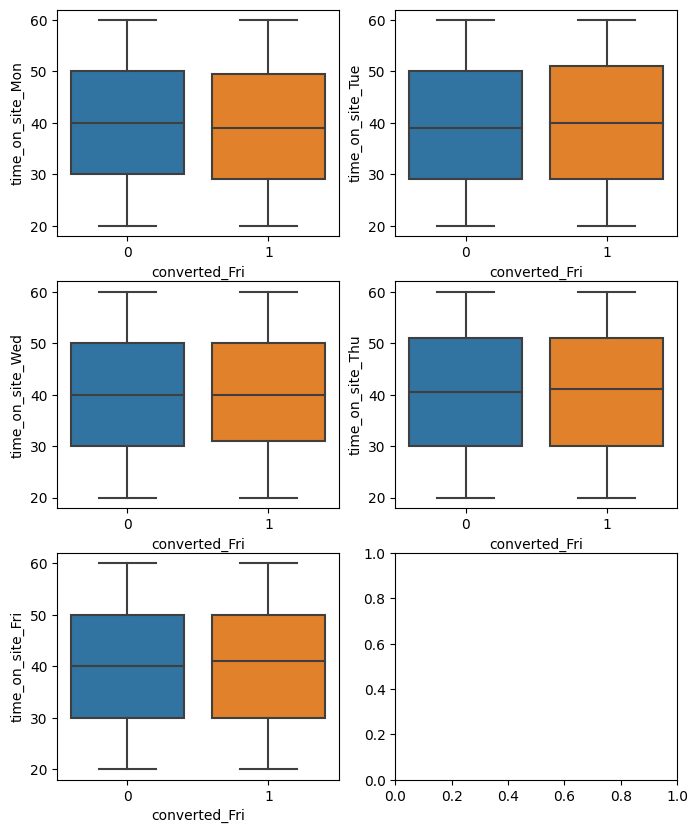

In [337]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, _)) = plt.subplots(3,2, figsize=(8,10))

sns.boxplot(x='converted_Fri',y='time_on_site_Mon', data=df, ax=ax1)
sns.boxplot(x='converted_Fri',y='time_on_site_Tue', data=df, ax=ax2)
sns.boxplot(x='converted_Fri',y='time_on_site_Wed', data=df, ax=ax3)
sns.boxplot(x='converted_Fri',y='time_on_site_Thu', data=df, ax=ax4)
sns.boxplot(x='converted_Fri',y='time_on_site_Fri', data=df, ax=ax5)

## Boxplot Takeaways

Time on site Monday: The time on site was slightly higher for those who did not convert, but not enough to suggest a correlation.

Time on site Tuesday: The time on site was slightly higher for those who converted, but not enough to suggest a correlation.

Time on site Wednesday: The time on site was even.

Time on site Thursday: The time on site was slightly higher for those who converted, but not enough to suggest a correlation.

Time on site Friday: The time on site was slightly higher for those who converted, but not enough to suggest a correlation.

<Axes: xlabel='converted_Fri', ylabel='pages_visited_Fri'>

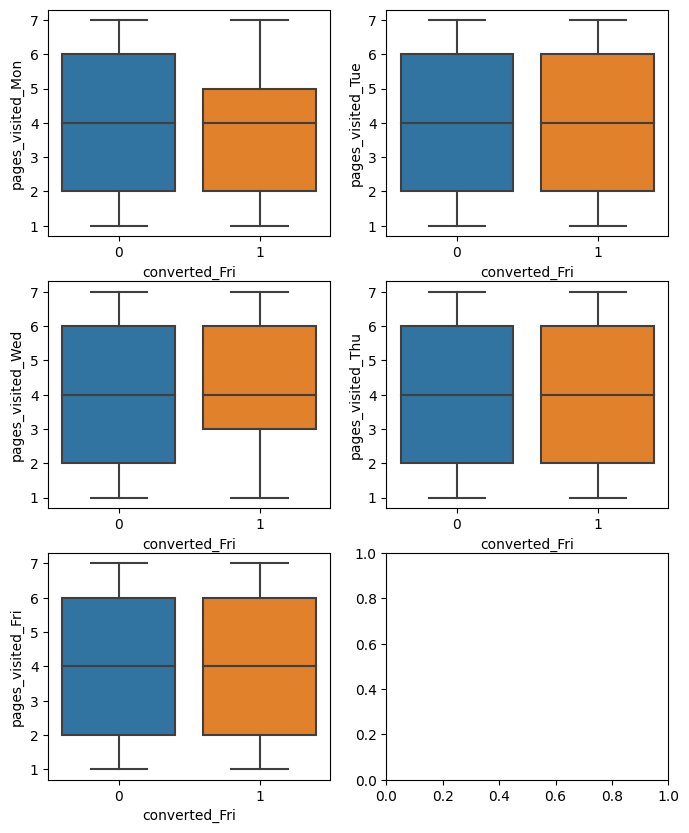

In [338]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, _)) = plt.subplots(3,2, figsize=(8,10))

sns.boxplot(x='converted_Fri',y='pages_visited_Mon', data=df, ax=ax1)
sns.boxplot(x='converted_Fri',y='pages_visited_Tue', data=df, ax=ax2)
sns.boxplot(x='converted_Fri',y='pages_visited_Wed', data=df, ax=ax3)
sns.boxplot(x='converted_Fri',y='pages_visited_Thu', data=df, ax=ax4)
sns.boxplot(x='converted_Fri',y='pages_visited_Fri', data=df, ax=ax5)

## Boxplot Takeaways

Pages visited Monday: The average of pages visited is the same, with a greater range for those who did not convert.

Pages visited Tuesday: The average of pages visited is the same.

Pages visited Wednesday: The average of pages visited is the same, with a greater range for those who did not convert.

Pages visited Thursday: The average of pages visited is the same.

Pages visited Friday: The average of pages visited is the same.

Now check categorical variables

In [339]:
df.groupby('converted_Fri').count()

,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,...,time_on_site_Mon,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri
converted_Fri,,,,,,,,,,,,,,,,,,,,,
0,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256,...,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256
1,603,603,603,603,603,603,603,603,603,603,...,603,603,603,603,603,603,603,603,603,603


There is a clear lack of balance in the data, however since there are only 2 categories there is nothing that can be done to fix it. The general hope is that the lack of balance would favour people conversions, however it favours people who did not convert, highlighting the problem to solve.

In [340]:
demographic = df.groupby(['converted_Fri','visitor_location'])['visitor_id'].count().unstack()
demographic

visitor_location,Asia,Australia,Europe,North America,South America
converted_Fri,,,,,
0,231,268,235,267,255
1,103,112,127,114,147


In [341]:
Conversions_Asia = (103 / (103 + 231)) * 100
Conversions_Australia = (112 / (112 + 268)) * 100
Conversions_Europe = (127 / (127 + 235)) * 100
Conversions_NAmerica = (114 / (114 + 267)) * 100
Conversions_SAmerica = (147 / (147 + 255)) * 100

print(Conversions_Asia, Conversions_Australia, Conversions_Europe, Conversions_NAmerica, Conversions_SAmerica)

30.83832335329341 29.47368421052631 35.0828729281768 29.92125984251969 36.56716417910448


Demographic may not be the best predictor as all non-conversions are at least 100 more than conversions. It seems that on a relative sense the worst place is Austraila and the best place is South America.  

In [342]:
channel = df.groupby(['converted_Fri','marketing_channel'])['visitor_id'].count().unstack()
channel

marketing_channel,facebook,google,instagram,organic,youtube
converted_Fri,,,,,
0,238,234,257,311,216
1,128,130,141,75,129


In [343]:
Conversions_facebook = (128 / (128 + 238)) * 100
Conversions_google = (130 / (130 + 234)) * 100
Conversions_instagram = (141 / (141 + 257)) * 100
Conversions_organic = (75 / (75 + 311)) * 100
Conversions_youtube = (129 / (129 + 216)) * 100

print(Conversions_facebook, Conversions_google, Conversions_instagram, Conversions_organic, Conversions_youtube)

34.97267759562842 35.714285714285715 35.427135678391956 19.4300518134715 37.391304347826086


While not great, with the exception of organic channel this seems to be a better indicator of getting conversions. Maybe sometime to focus on is marketing.

In [344]:
gender = df.groupby(['converted_Fri','gender'])['visitor_id'].count().unstack()
gender

gender,F,M
converted_Fri,,
0,602,654
1,404,199


In [345]:
Conversions_female = (404 / (404 + 602)) * 100
Conversions_male = (199 / (199 + 654)) * 100

print(Conversions_female, Conversions_male)

40.15904572564612 23.329425556858148


There is a clear indication that we will see better results if we focus our attention on marketing to women.

## Feature Engineering

In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1859 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   visitor_id         1859 non-null   int64  
 1   visitor_location   1859 non-null   object 
 2   marketing_channel  1859 non-null   object 
 3   gender             1859 non-null   object 
 4   product_views_Mon  1859 non-null   int64  
 5   product_views_Tue  1859 non-null   int64  
 6   product_views_Wed  1859 non-null   int64  
 7   product_views_Thu  1859 non-null   int64  
 8   product_views_Fri  1859 non-null   int64  
 9   avg_rating_Mon     1859 non-null   float64
 10  avg_rating_Tue     1859 non-null   float64
 11  avg_rating_Wed     1859 non-null   float64
 12  avg_rating_Thu     1859 non-null   float64
 13  avg_rating_Fri     1859 non-null   float64
 14  avg_price_Mon      1859 non-null   float64
 15  avg_price_Tue      1859 non-null   float64
 16  avg_price_Wed      1859 non-n

In [347]:
df['visitor_location'].describe()

count              1859
unique                5
top       South America
freq                402
Name: visitor_location, dtype: object

In [348]:
df['visitor_location'].unique()

array(['North America', 'South America', 'Asia', 'Australia', 'Europe'],
      dtype=object)

In [349]:
location_mapping = {'North America':1, 'South America':2, 'Asia':3, 'Australia':4, 'Europe':5}
df['visitor_location'] = df['visitor_location'].map(location_mapping)

In [350]:
df['marketing_channel'].unique()

array(['youtube', 'organic', 'facebook', 'instagram', 'google'],
      dtype=object)

In [351]:
channel_mapping = {'youtube':1, 'organic':2, 'facebook':3, 'instagram':4, 'google':5}
df['marketing_channel'] = df['marketing_channel'].map(channel_mapping)

In [352]:
df['gender'].unique()

array(['M', 'F'], dtype=object)

In [353]:
gender_mapping = {'M':1, 'F':2}
df['gender'] = df['gender'].map(gender_mapping)

In [354]:
df['product_views_Mon'].describe()

count    1859.000000
mean        2.545992
std         1.708400
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: product_views_Mon, dtype: float64

In [355]:
df['product_views_Tue'].describe()

count    1859.000000
mean        2.440559
std         1.713334
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: product_views_Tue, dtype: float64

In [356]:
df['avg_rating_Mon'].describe()

count    1859.000000
mean        3.012297
std         1.151558
min         1.000000
25%         2.010000
50%         3.030000
75%         4.000000
max         5.000000
Name: avg_rating_Mon, dtype: float64

In the view variables, I do not believe there is enough variation to warrant altering them into ranges

In [357]:
results = ols("converted_Fri ~ visitor_location + marketing_channel + gender + product_views_Mon + product_views_Tue + product_views_Wed + product_views_Thu + product_views_Fri + avg_rating_Mon + avg_price_Tue + avg_rating_Wed + avg_rating_Thu + avg_rating_Fri + avg_price_Mon + avg_price_Tue + avg_price_Wed + avg_price_Thu + avg_price_Fri + time_on_site_Mon + time_on_site_Tue + time_on_site_Wed + time_on_site_Thu + time_on_site_Fri + pages_visited_Mon + pages_visited_Tue + pages_visited_Wed + pages_visited_Thu + pages_visited_Fri", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          converted_Fri   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     39.92
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          2.49e-162
Time:                        21:58:08   Log-Likelihood:                -796.57
No. Observations:                1859   AIC:                             1649.
Df Residuals:                    1831   BIC:                             1804.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.3038      0.11

Remove the variables that generate a larger p-score than 0.05 since it is not repeatable

In [358]:
results = ols("converted_Fri ~ marketing_channel + gender + product_views_Thu + product_views_Fri + pages_visited_Mon + pages_visited_Wed", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          converted_Fri   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     176.7
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          5.05e-178
Time:                        21:58:08   Log-Likelihood:                -806.06
No. Observations:                1859   AIC:                             1626.
Df Residuals:                    1852   BIC:                             1665.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.2613      0.04

Lets create some variables

In [359]:
product_view = df.groupby('gender')['product_views_Thu'].mean()/df.groupby('gender')['product_views_Fri'].mean()
df = df.merge(product_view.rename('product_view'), left_on='gender', right_index=True)

In [360]:
product_view_2 = df.groupby('visitor_location')['product_views_Thu'].mean()/df.groupby('visitor_location')['product_views_Fri'].mean()
df = df.merge(product_view_2.rename('product_view_2'), left_on='visitor_location', right_index=True)

In [361]:
product_view_3 = df.groupby('marketing_channel')['product_views_Thu'].mean()/df.groupby('marketing_channel')['product_views_Fri'].mean()
df = df.merge(product_view_3.rename('product_view_3'), left_on='marketing_channel', right_index=True)

In [362]:
results = ols("converted_Fri ~ marketing_channel + gender + product_views_Thu + product_views_Fri + pages_visited_Mon + pages_visited_Wed + product_view + product_view_2 + product_view_3", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          converted_Fri   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     132.9
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          2.65e-176
Time:                        21:58:08   Log-Likelihood:                -804.83
No. Observations:                1859   AIC:                             1628.
Df Residuals:                    1850   BIC:                             1677.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0162      0.10

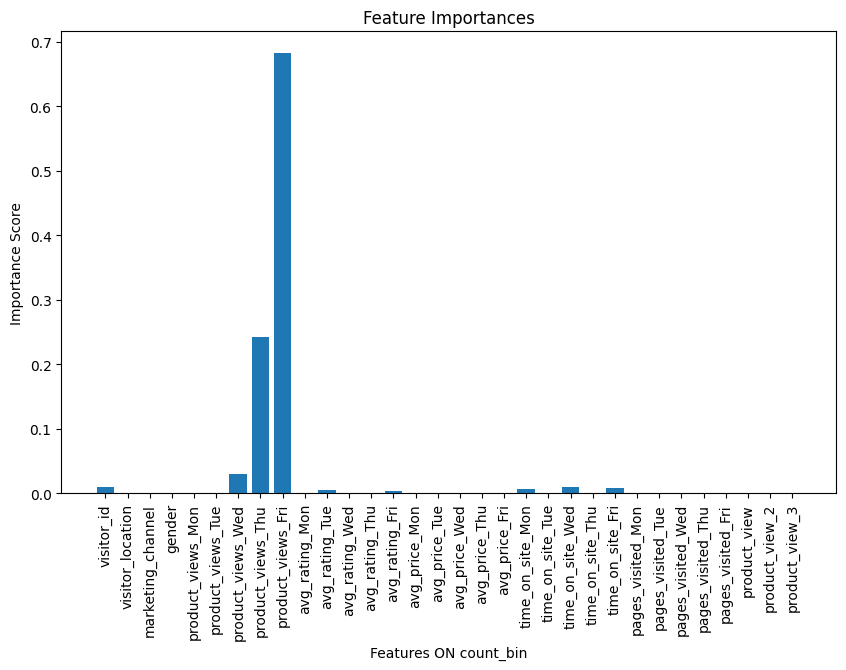

In [363]:
#Lets determine feature importance
X = df.drop(['converted_Fri'], axis=1)  # Independent variables (all columns except 'DEFAULT')
y = df['converted_Fri']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_dist = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

model = DecisionTreeClassifier(random_state=42)
grid_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
feature_importances = best_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xlabel('Features ON count_bin')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()

Clearly products viewed thursday and friday have a big impact

In [364]:
pred_vals = results.predict(df[['marketing_channel', 'gender', 'product_views_Thu', 'product_views_Fri', 'pages_visited_Mon', 'pages_visited_Wed', 'product_view', 'product_view_2', 'product_view_3']])
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),df['converted_Fri']], axis=1)
res['error'] = res['y_hat'] - res['converted_Fri']
res['sq_error'] = res['error']**2
RMSE = np.sqrt(res['sq_error'].mean())
print("RMSE:", RMSE)

RMSE: 0.3730659875218974


In [365]:
df.head()

,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,...,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri,product_view,product_view_2,product_view_3
0,1,1,1,1,4,5,2,1,2,3.90,...,57,4,5,5,4,6,1,0.972453,0.926421,1.002235
462,463,1,1,1,5,4,1,0,0,4.24,...,25,5,1,1,7,5,0,0.972453,0.926421,1.002235
557,558,1,1,1,3,4,5,5,5,4.64,...,52,3,7,1,1,4,1,0.972453,0.926421,1.002235
615,616,1,1,1,3,5,0,1,0,1.95,...,31,5,5,5,5,6,0,0.972453,0.926421,1.002235
636,637,1,1,1,0,0,0,1,3,3.18,...,54,2,4,4,7,4,0,0.972453,0.926421,1.002235


In [366]:
columns = df[['marketing_channel', 'gender', 'product_views_Thu', 'product_views_Fri', 'pages_visited_Mon', 'pages_visited_Wed', 'product_view', 'product_view_2', 'product_view_3']]

In [367]:
X = columns.select_dtypes(include='number')
y = df['converted_Fri']

In [368]:
scaler = StandardScaler()
model_X = scaler.fit(X)
X_scaled = model_X.transform(X)

X_train, X_test, y_train, y_test = train_test_split (X_scaled, y, random_state=42, test_size=0.3, shuffle=True)

In [369]:
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [50, 100, 200],
    'C': [0.01, 0.1, 1, 10]
}
grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [370]:
log_reg = linear_model.LogisticRegression(solver = 'newton-cg', max_iter=50)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [371]:
print("Logistic Regression Model Accuracy (in %):",
metrics.accuracy_score(y_test, y_pred) * 100)

Logistic Regression Model Accuracy (in %): 80.28673835125448


In [374]:
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Precision:  0.7305389221556886
Recall:  0.6524064171122995
F1 Score:  0.6892655367231638


In [375]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [376]:
print("KNN Model Accuracy (in %):",
metrics.accuracy_score(y_test, y_pred) * 100)

KNN Model Accuracy (in %): 79.56989247311827


In [377]:
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Precision:  0.7588652482269503
Recall:  0.5721925133689839
F1 Score:  0.6524390243902438


In [378]:
params_knn = {'n_neighbors': list(range(1,500)), 'weights': ['uniform', 'distance'], 'metric': ['l1', 'euclidean', 'manhattan', 'sokalsneath', 'hamming', 'sokalmichener', 'rogerstanimoto', 'braycurtis', 'dice', 'jaccard', 'pyfunc', 'haversine', 'matching', 'cityblock', 'correlation', 'l2', 'nan_euclidean', 'chebyshev', 'p', 'wminkowski', 'minkowski', 'cosine', 'infinity', 'russellrao', 'seuclidean', 'canberra', 'kulsinski', 'sqeuclidean', 'yule', 'mahalanobis'] }
randomsearch_knn = RandomizedSearchCV(knn, params_knn, cv=10, n_iter=20, scoring='accuracy')

randomsearch_knn.fit(X_train, y_train)

print("Best parameters from RandomSearch: ", randomsearch_knn.best_params_)

Best parameters from RandomSearch:  {'weights': 'uniform', 'n_neighbors': 7, 'metric': 'manhattan'}


In [379]:
knn_best = KNeighborsClassifier(**randomsearch_knn.best_params_)
cv_scores_knn = cross_val_score(knn_best, X_train, y_train, cv=5, scoring='accuracy')
knn_best.fit(X_train, y_train)
y_pred_knn = knn_best.predict(X_test)

In [380]:
print(cv_scores_knn)
print("\nK-Nearest Neighbors Metrics: ")
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))

[0.82375479 0.8        0.84230769 0.82692308 0.89615385]

K-Nearest Neighbors Metrics: 
Accuracy:  0.8189964157706093


In [381]:
d_tree = DecisionTreeClassifier(random_state=42, max_depth=8)
d_tree.fit(X_train, y_train)
y_pred = d_tree.predict(X_test)

In [382]:
print("Decsision Tree Model Accuracy (in %):",
metrics.accuracy_score(y_test, y_pred) * 100)

Decsision Tree Model Accuracy (in %): 84.76702508960572


In [383]:
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Precision:  0.7712765957446809
Recall:  0.7754010695187166
F1 Score:  0.7733333333333333


In [384]:
rforest = RandomForestClassifier(n_estimators = 200)
rforest.fit(X_train, y_train)
y_pred = rforest.predict(X_test)

In [385]:
print("Random Forest Model Accuracy (in %):",
metrics.accuracy_score(y_test, y_pred) * 100)

Random Forest Model Accuracy (in %): 86.37992831541219


In [386]:
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Precision:  0.8284023668639053
Recall:  0.7486631016042781
F1 Score:  0.7865168539325842


1. My hypothesis was proven incorrect, as can be seen in variuous analysis and graphs, location was not an important factor.

2. My approach was centered around incorporating as many variables as possible. I included everything, then took out variables with p-values greater than 0.05, then I tried to incorporate variables inside the feature importance graph that had major importance. Also used the bi-variate analysis

3. Random forrest was the best as it generated the best results.

4. Use the bi-variate analysis to show what is important, then use the model to show the important days in getting conversions.